# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [ ]:
# Print the city count to confirm sufficient count
len(cities)


In [4]:
cities

['cape town',
 'pangnirtung',
 'hobyo',
 'san andres',
 'tromso',
 'vao',
 'hermanus',
 'mataura',
 'airai',
 'skjervoy',
 'hilo',
 'east london',
 'albany',
 'san vicente',
 'miri',
 'qaanaaq',
 'kapaa',
 'cidreira',
 'marcona',
 'luwingu',
 'ushuaia',
 'gunnedah',
 'tonj',
 'jamestown',
 'nome',
 'oranjemund',
 'miami beach',
 'pochutla',
 'bredasdorp',
 'khatanga',
 'beringovskiy',
 'saint-pierre',
 'batagay',
 'atuona',
 'zhangye',
 'sao filipe',
 'esperance',
 'rikitea',
 'longyearbyen',
 'provideniya',
 'arlit',
 'velykyy burluk',
 'tongling',
 'cabo san lucas',
 'keetmanshoop',
 'peniche',
 'okha',
 'punta arenas',
 'avarua',
 'faanui',
 'deputatskiy',
 'victoria',
 'san patricio',
 'axim',
 'taolanaro',
 'busselton',
 'ribeira grande',
 'panguna',
 'sinnamary',
 'belushya guba',
 'idlib',
 'kaitangata',
 'puerto ayora',
 'tura',
 'bengkulu',
 'alakurtti',
 'souillac',
 'saint-philippe',
 'netanya',
 'piltene',
 'robinson',
 'codrington',
 'talnakh',
 'sangar',
 'korla',
 'palli

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "https://api.openweathermap.org/data/2.5/weather?appid="
data = []
count = 1
for city in cities:
    url = base_url + weather_api_key + "&q=" + city + "&units=metric"
    
    if count == 1:
        print("API aclls")
    
    print(f"{count} data for {city}")
    print(url)
    response = requests.get(url)
    try:
        final_results = response.json()
        data.append(final_results)
        count = count + 1
    except KeyError:
        next        
print(f"{count} successful calls made")

API aclls
1 data for cape town
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=cape town&units=metric
2 data for pangnirtung
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=pangnirtung&units=metric
3 data for hobyo
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=hobyo&units=metric
4 data for san andres
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=san andres&units=metric
5 data for tromso
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=tromso&units=metric
6 data for vao
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=vao&units=metric
7 data for hermanus
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=hermanus&units=metric
8 data for mataura
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977

63 data for puerto ayora
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=puerto ayora&units=metric
64 data for tura
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=tura&units=metric
65 data for bengkulu
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=bengkulu&units=metric
66 data for alakurtti
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=alakurtti&units=metric
67 data for souillac
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=souillac&units=metric
68 data for saint-philippe
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=saint-philippe&units=metric
69 data for netanya
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=netanya&units=metric
70 data for piltene
https://api.openweathermap.org/data/2.5/weat

125 data for port alfred
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=port alfred&units=metric
126 data for liuzhou
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=liuzhou&units=metric
127 data for igboho
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=igboho&units=metric
128 data for yellowknife
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=yellowknife&units=metric
129 data for havoysund
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=havoysund&units=metric
130 data for matara
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=matara&units=metric
131 data for dunmore town
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=dunmore town&units=metric
132 data for umba
https://api.openweathermap.org/data/2.5

187 data for chokurdakh
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=chokurdakh&units=metric
188 data for vardo
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=vardo&units=metric
189 data for hithadhoo
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=hithadhoo&units=metric
190 data for ukiah
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=ukiah&units=metric
191 data for andros town
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=andros town&units=metric
192 data for bolungarvik
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=bolungarvik&units=metric
193 data for praia da vitoria
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=praia da vitoria&units=metric
194 data for macaboboni
https://api.openweather

248 data for mubi
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=mubi&units=metric
249 data for dharchula
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=dharchula&units=metric
250 data for barentsburg
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=barentsburg&units=metric
251 data for adrar
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=adrar&units=metric
252 data for attawapiskat
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=attawapiskat&units=metric
253 data for teguise
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=teguise&units=metric
254 data for tuatapere
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=tuatapere&units=metric
255 data for lavrentiya
https://api.openweathermap.org/data/2.5/wea

310 data for saskylakh
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=saskylakh&units=metric
311 data for yulara
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=yulara&units=metric
312 data for kushmurun
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=kushmurun&units=metric
313 data for andenes
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=andenes&units=metric
314 data for zaraza
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=zaraza&units=metric
315 data for fare
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=fare&units=metric
316 data for biak
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=biak&units=metric
317 data for oistins
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fdd

372 data for palana
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=palana&units=metric
373 data for shimoda
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=shimoda&units=metric
374 data for berlin
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=berlin&units=metric
375 data for bandarbeyla
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=bandarbeyla&units=metric
376 data for brae
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=brae&units=metric
377 data for lida
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=lida&units=metric
378 data for micheweni
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=micheweni&units=metric
379 data for viedma
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138

434 data for wanning
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=wanning&units=metric
435 data for yeppoon
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=yeppoon&units=metric
436 data for uberlandia
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=uberlandia&units=metric
437 data for nawabshah
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=nawabshah&units=metric
438 data for svetlaya
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=svetlaya&units=metric
439 data for puerto suarez
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=puerto suarez&units=metric
440 data for sentyabrskiy
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=sentyabrskiy&units=metric
441 data for ambilobe
https://api.openweathermap.

496 data for san juan bautista
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=san juan bautista&units=metric
497 data for buin
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=buin&units=metric
498 data for ambon
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=ambon&units=metric
499 data for temaraia
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=temaraia&units=metric
500 data for sola
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=sola&units=metric
501 data for mareeba
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=mareeba&units=metric
502 data for lakhdenpokhya
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=lakhdenpokhya&units=metric
503 data for zhanaozen
https://api.openweathermap.org/data/2.5/we

558 data for reconquista
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=reconquista&units=metric
559 data for salas
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=salas&units=metric
560 data for aksu
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=aksu&units=metric
561 data for nioro
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=nioro&units=metric
562 data for sao raimundo nonato
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=sao raimundo nonato&units=metric
563 data for palabuhanratu
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=palabuhanratu&units=metric
564 data for qaqortoq
https://api.openweathermap.org/data/2.5/weather?appid=85e4b977b0138fddcdeb1503708d40e9&q=qaqortoq&units=metric
565 data for ketchikan
https://api.openweathermap.o

In [ ]:
 data[0]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
lat = []
lon = []
temp = []
winds = []
cloud = []
city = []
hum = []
country = []


for entry in data:
    try:
        lat.append(entry["coord"]["lat"])
        lon.append(entry["coord"]["lon"])
        temp.append(entry["main"]["temp"])
        hum.append(entry["main"]["humidity"])
        winds.append(entry["wind"]["speed"])
        cloud.append(entry["clouds"]["all"])
        city.append(entry["name"])
        country.append(entry["sys"]["country"])
    except:
        next

In [16]:
df= pd.DataFrame({"Cities": city,
                 "Longitude":lon,
                "Latitude":lat,
                        "Temperature":temp,
                        "Country":country, 
                         "Cloudines":cloud,
                        "Humidity" :hum,
                        "Wind Speed":winds}) 

In [17]:
df.head()

,Cities,Longitude,Latitude,Temperature,Country,Cloudines,Humidity,Wind Speed
0,Cape Town,18.42,-33.93,15.87,ZA,75,93,3.10
1,Pangnirtung,-65.71,66.15,-3.80,CA,100,94,1.07
2,Hobyo,48.53,5.35,29.76,SO,99,63,4.20
3,San Andrés,-81.70,12.58,26.00,CO,75,94,1.55
4,Tromsø,18.96,69.65,2.00,NO,75,88,5.70


In [18]:
df.to_csv('data.csv') 

In [19]:
path = 'data.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
final_data=pd.read_csv(path)

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
final_data.drop(final_data[final_data["Humidity"]>100].index, inplace=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

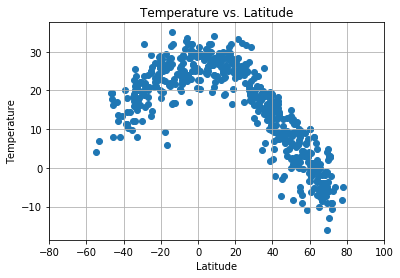

In [23]:
x=final_data["Latitude"]
y= final_data["Temperature"]
plt.xlim(-80,100)
plt.scatter(final_data["Latitude"], final_data["Temperature"] )
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('latitude_vs_temp.png')
plt.grid()

## Latitude vs. Humidity Plot

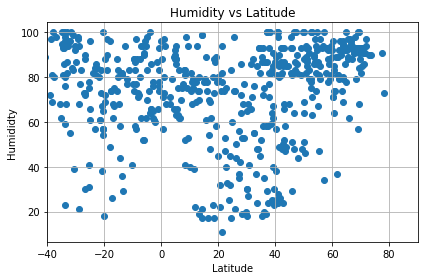

In [24]:
x=final_data["Latitude"]
y= final_data["Humidity"]
plt.xlim(-40,90)
plt.scatter(final_data["Latitude"], final_data["Humidity"] )
plt.title("Humidity vs Latitude")
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humididty")
plt.grid()
plt.savefig('latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

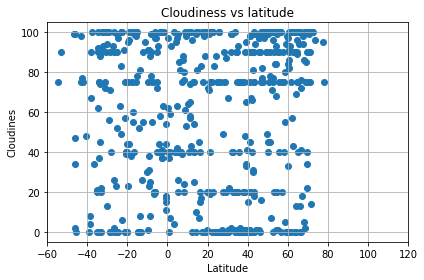

In [31]:
x=final_data["Latitude"]
y= final_data["Cloudines"]
plt.xlim(-60,120)
plt.scatter(final_data["Latitude"], final_data["Cloudines"] )
plt.title("Cloudiness vs latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudines")
plt.tight_layout()

plt.grid()
plt.savefig('latitude_vs_cloudines.png')

## Latitude vs. Wind Speed Plot

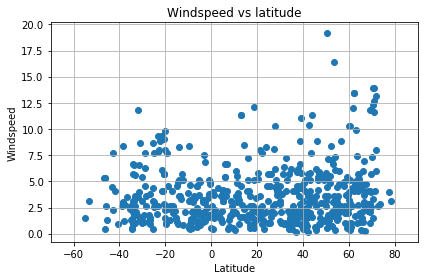

In [30]:
x=final_data["Latitude"]
y= final_data["Wind Speed"]
plt.xlim(-70,90)
plt.scatter(final_data["Latitude"], final_data["Wind Speed"] )
plt.title("Windspeed vs latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.tight_layout()

plt.grid()
plt.savefig('latitude_vs_wind.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression